# Salary Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing  import power_transform
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [2]:
salaries=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Checking Columns

In [3]:
salaries.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Checking all Null Values

In [4]:
salaries.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Checking Data Type

In [5]:
salaries.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Converting into Float Data Type

In [6]:
salaries['yrs.since.phd']=salaries['yrs.since.phd'].astype(float)
salaries['yrs.service']=salaries['yrs.service'].astype(float)
salaries['salary']=salaries['salary'].astype(float)

In [7]:
salaries.dtypes

rank              object
discipline        object
yrs.since.phd    float64
yrs.service      float64
sex               object
salary           float64
dtype: object

# Making DataFrame of Nominal Data

In [8]:
salaries_nominal=salaries[['rank', 'discipline', 'sex']].copy()
salaries.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


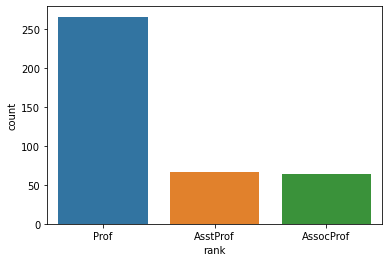

In [9]:
ax=sns.countplot(x="rank",data=salaries_nominal)
print(salaries_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


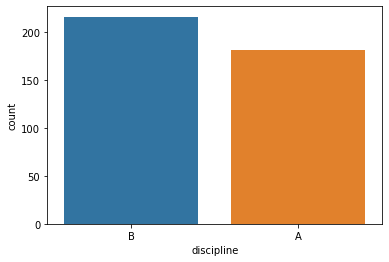

In [10]:
ax=sns.countplot(x="discipline",data=salaries_nominal)
print(salaries_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


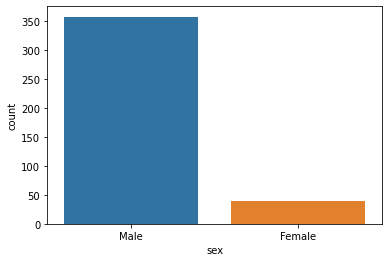

In [11]:
ax=sns.countplot(x="sex",data=salaries_nominal)
print(salaries_nominal["sex"].value_counts())

# Making DataFrame of Continuous Data

In [12]:
salaries_continuous=salaries[['yrs.since.phd','yrs.service', 'salary']].copy()
salaries_continuous.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

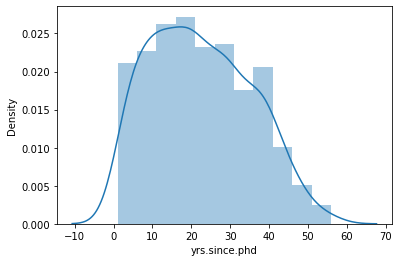

In [13]:
sns.distplot(salaries_continuous['yrs.since.phd'],kde=True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

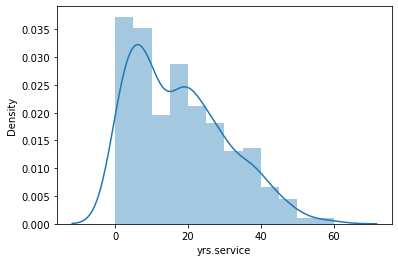

In [14]:
sns.distplot(salaries_continuous['yrs.service'],kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

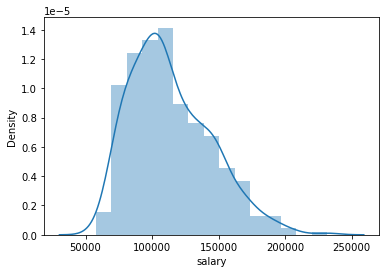

In [15]:
sns.distplot(salaries_continuous['salary'],kde=True)

# Encoding of DataFrame

In [16]:
from sklearn.preprocessing import OrdinalEncoder
Encoder=OrdinalEncoder()

In [17]:
for i in salaries.columns:
    if salaries[i].dtypes=="object":
        salaries[i]=Encoder.fit_transform(salaries[i].values.reshape(-1,1))

In [18]:
salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19.0,18.0,1.0,139750.0
1,2.0,1.0,20.0,16.0,1.0,173200.0
2,1.0,1.0,4.0,3.0,1.0,79750.0
3,2.0,1.0,45.0,39.0,1.0,115000.0
4,2.0,1.0,40.0,41.0,1.0,141500.0
...,...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0,103106.0
393,2.0,0.0,31.0,19.0,1.0,150564.0
394,2.0,0.0,42.0,25.0,1.0,101738.0
395,2.0,0.0,25.0,15.0,1.0,95329.0


# Describing Dataset

In [19]:
salaries.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

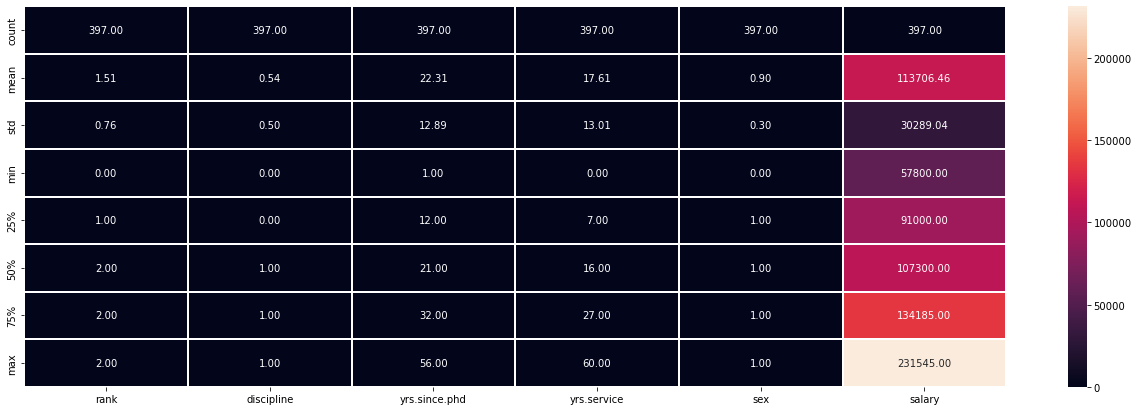

In [20]:
plt.figure(figsize=(22,7))
sns.heatmap(salaries.describe(), annot=True, linewidth=0.1, linecolor="white", fmt="0.2f")

# Checking Correlation with Target Variable

In [21]:
salaries.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

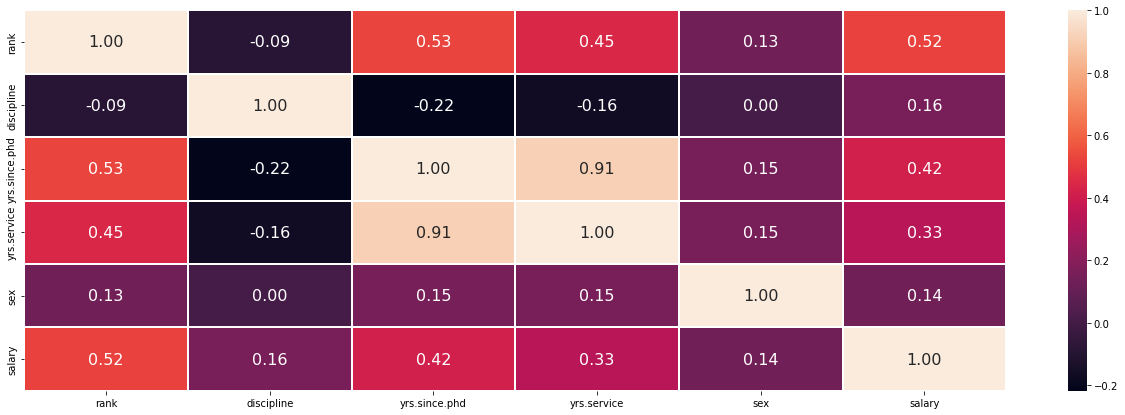

In [22]:
plt.figure(figsize=(22,7))
sns.heatmap(salaries.corr(), annot=True, linewidth=0.1, linecolor="white", fmt="0.2f",annot_kws={"size": 16})

#### Checking positive and Negative column

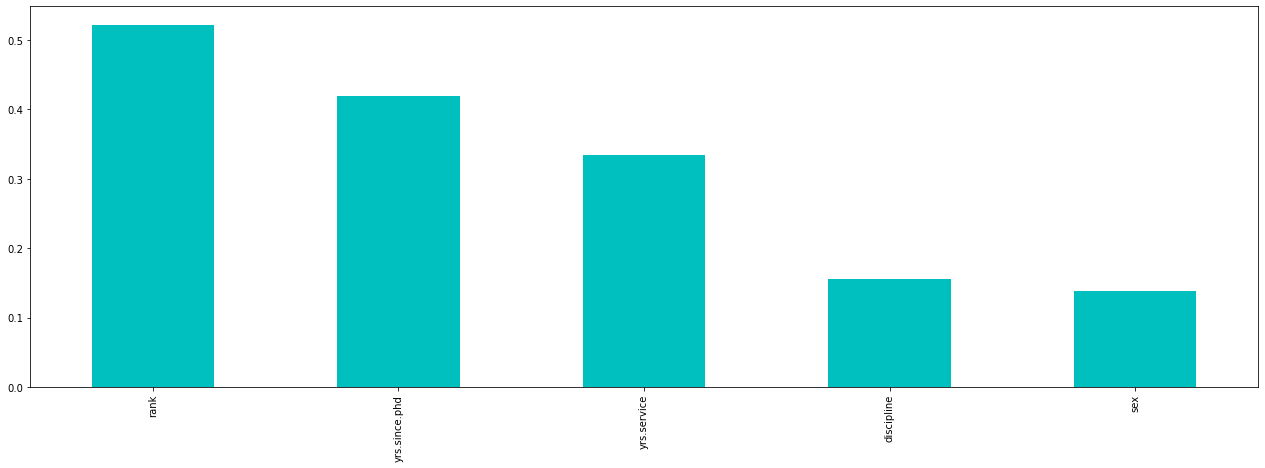

In [23]:
plt.figure(figsize=(22,7))
salaries.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel=('Feature')
plt.ylabel=('column with target names')
plt.title=('correlation')
plt.show()

# Checking Outliers

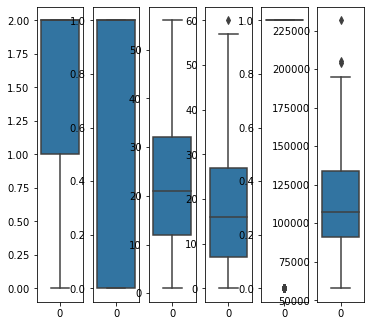

In [24]:
collist=salaries.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=salaries[collist[i]])

# Checking Skewness

In [25]:
salaries.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [26]:
salaries.drop(['yrs.since.phd'],axis=1, inplace=True)

In [27]:
salaries.drop(['rank'], axis=1, inplace =True)

In [28]:
salaries.drop(['discipline'], axis=1, inplace=True)

In [29]:
salaries.drop(['sex'], axis=1, inplace=True)

# Outliers removal with Scipy

In [30]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(salaries))
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [31]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))


In [32]:
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [33]:
z.iloc[43]

yrs.service    1.569358
salary         3.895377
Name: 43, dtype: float64

In [34]:
salaries_new= salaries[(z<3).all(axis=1)]

In [35]:
print('old_dataframe',salaries.shape)
print('new_dataframe', salaries_new.shape)
print('total_dropped_rows', salaries.shape[0]-salaries_new.shape[0])

old_dataframe (397, 2)
new_dataframe (393, 2)
total_dropped_rows 4


In [36]:
loss_percent=((397-354)/397)*100
loss_percent

10.831234256926953

In [37]:
salaries_new

,yrs.service,salary
0,18.0,139750.0
1,16.0,173200.0
2,3.0,79750.0
3,39.0,115000.0
4,41.0,141500.0
...,...,...
392,30.0,103106.0
393,19.0,150564.0
394,25.0,101738.0
395,15.0,95329.0


In [38]:
x=salaries_new.iloc[:,:-1]

In [40]:
y=salaries_new.iloc[:,-1]

# Removing all skewness

In [41]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.26888583],
       [ 0.1209006 ],
       [-1.28449532],
       [ 1.46109915],
       [ 1.55315864],
       [-0.84005312],
       [ 0.60337981],
       [ 1.72997607],
       [ 0.40814245],
       [ 0.26888583],
       [-0.60348074],
       [-1.47508922],
       [-1.70716059],
       [-2.02223253],
       [ 0.26888583],
       [-1.28449532],
       [ 0.40814245],
       [ 1.21866709],
       [ 0.60337981],
       [ 1.31789249],
       [ 0.78500622],
       [ 1.06349813],
       [ 1.00992197],
       [ 0.33951754],
       [-0.60348074],
       [-0.60348074],
       [ 0.60337981],
       [-1.28449532],
       [-2.02223253],
       [-0.60348074],
       [-1.11979784],
       [-1.47508922],
       [-0.49655514],
       [-1.47508922],
       [-1.47508922],
       [-2.02223253],
       [ 0.47490923],
       [-1.11979784],
       [ 1.06349813],
       [-0.49655514],
       [-1.47508922],
       [ 0.60337981],
       [ 0.84294347],
       [ 0.33951754],
       [ 0.04312953],
       [ 0

# Scaling using Standard Scaler

In [42]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.26888583],
       [ 0.1209006 ],
       [-1.28449532],
       [ 1.46109915],
       [ 1.55315864],
       [-0.84005312],
       [ 0.60337981],
       [ 1.72997607],
       [ 0.40814245],
       [ 0.26888583],
       [-0.60348074],
       [-1.47508922],
       [-1.70716059],
       [-2.02223253],
       [ 0.26888583],
       [-1.28449532],
       [ 0.40814245],
       [ 1.21866709],
       [ 0.60337981],
       [ 1.31789249],
       [ 0.78500622],
       [ 1.06349813],
       [ 1.00992197],
       [ 0.33951754],
       [-0.60348074],
       [-0.60348074],
       [ 0.60337981],
       [-1.28449532],
       [-2.02223253],
       [-0.60348074],
       [-1.11979784],
       [-1.47508922],
       [-0.49655514],
       [-1.47508922],
       [-1.47508922],
       [-2.02223253],
       [ 0.47490923],
       [-1.11979784],
       [ 1.06349813],
       [-0.49655514],
       [-1.47508922],
       [ 0.60337981],
       [ 0.84294347],
       [ 0.33951754],
       [ 0.04312953],
       [ 0

# Creating Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Linear Regression Model

In [45]:
lr=LinearRegression()

# Splitting the DataFrame into train-test-split

In [46]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('Linear regression model Result are:-' )
    print('At random state' , {i} , ':' , 'the training accuracy is : ',{r2_score(y_train,pred_train)})
    print('At random state' , {i} , ':' , 'the testing accuracy is : ',{r2_score(y_test,pred_test)},'\n')

Linear regression model Result are:-
At random state {0} : the training accuracy is :  {0.1610479919279184}
At random state {0} : the testing accuracy is :  {0.13396664058725594} 

Linear regression model Result are:-
At random state {1} : the training accuracy is :  {0.12978231107357874}
At random state {1} : the testing accuracy is :  {0.2394466797762541} 

Linear regression model Result are:-
At random state {2} : the training accuracy is :  {0.1686536436733862}
At random state {2} : the testing accuracy is :  {0.0752975491138882} 

Linear regression model Result are:-
At random state {3} : the training accuracy is :  {0.16366002227604015}
At random state {3} : the testing accuracy is :  {0.11576053042527867} 

Linear regression model Result are:-
At random state {4} : the training accuracy is :  {0.15368033269201398}
At random state {4} : the testing accuracy is :  {0.15793372009668039} 

Linear regression model Result are:-
At random state {5} : the training accuracy is :  {0.1377

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=9, test_size=0.20)

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
pred_test=lr.predict(x_test)

In [50]:
print({r2_score(y_test,pred_test)})

{0.10099770383539175}


In [51]:
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred_test,y_test))
print('mean_squared_error', mean_squared_error(pred_test,y_test))

Result  from Linear regression model
R2 score is  -7.086377271667082
mean_squared_error 966740453.8160942


# Cross Validation score for Linear Regression

In [52]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

In [53]:
from sklearn.model_selection import cross_val_score

In [56]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",{j},"the cv score is ", {cv_mean}, "\n and accuracy score for training is ",{train_accuracy},"\n and accuracy score for testing is",{test_accuracy}, "\n" )

At cross fold  {2} the cv score is  {0.12791664084316184} 
 and accuracy score for training is  {-0.09365807827023387} 
 and accuracy score for testing is {0.10099770383539175} 

At cross fold  {3} the cv score is  {0.134069755121102} 
 and accuracy score for training is  {-0.09365807827023387} 
 and accuracy score for testing is {0.10099770383539175} 

At cross fold  {4} the cv score is  {0.14503408040293578} 
 and accuracy score for training is  {-0.09365807827023387} 
 and accuracy score for testing is {0.10099770383539175} 

At cross fold  {5} the cv score is  {0.12528334205778283} 
 and accuracy score for training is  {-0.09365807827023387} 
 and accuracy score for testing is {0.10099770383539175} 

At cross fold  {6} the cv score is  {0.13373457201773156} 
 and accuracy score for training is  {-0.09365807827023387} 
 and accuracy score for testing is {0.10099770383539175} 

At cross fold  {7} the cv score is  {0.10458026450532798} 
 and accuracy score for training is  {-0.0936580

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [58]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

ls_score=r2_score(y_test,pred_ls)
ls_score

0.10099719017099829

In [59]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.12528175832582533

In [60]:
ls.score(x_test,y_test)

0.10099719017099829

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Random Forest Regressor Model

In [62]:
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Random_forestregressor result :-')
print('R2 score is :',r2_score(pred,y_test))
print('mean_squared_error :', mean_squared_error(pred,y_test))

Random_forestregressor result :-
R2 score is : -2.3673528558176034
mean_squared_error : 891207603.3530983


# SVM Regressor Model

In [63]:
from sklearn.svm import SVR
sv = SVR(kernel ='rbf', gamma=1, epsilon=3)
sv.fit(x_train, y_train)
pred_sv= sv.predict(x_test)
print('SVM regrssor result :')
print('R2 score is :',r2_score(pred,y_test))
print('mean_squared_error :', mean_squared_error(pred,y_test))

SVM regrssor result :
R2 score is : -2.3673528558176034
mean_squared_error : 891207603.3530983


# KNN Regressor Model

In [64]:
from sklearn.neighbors  import KNeighborsRegressor
kn =KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
kn.fit(x_train, y_train)
pred_kn= kn.predict(x_test)
print(' KNN regressor result :-')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

 KNN regressor result :-
R2 score is  -2.3673528558176034
mean_squared_error 891207603.3530983


# Cross-Validation

In [65]:
from sklearn.model_selection import  KFold
from sklearn import linear_model
Kfold= KFold(9)
cv_mod= cross_val_score(lr,x,y,cv=Kfold)
print(cv_mod,'\n')
print(cv_mod.mean(),'\n')
print(cv_mod.std())

[ 0.26971103  0.27336854  0.13224895  0.29208181 -0.25622279 -0.2448996
 -0.05183403  0.10579446  0.214617  ] 

0.0816517076858883 

0.20435225049732111


In [66]:
import pickle
filename='salary_prediction'
pickle.dump(rf,open(filename,'wb'))

In [67]:
import numpy as np
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_sal=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_sal

,Orginal,Predicted
0,168500.0,121997.288299
1,57800.0,92332.950000
2,82099.0,94367.441503
3,79750.0,87350.986557
4,162221.0,118991.652778
...,...,...
74,82100.0,142284.429206
75,101738.0,138920.240108
76,170000.0,128821.415000
77,141136.0,125554.143810
